Initial example from https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import pandas as pd

In [2]:

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))


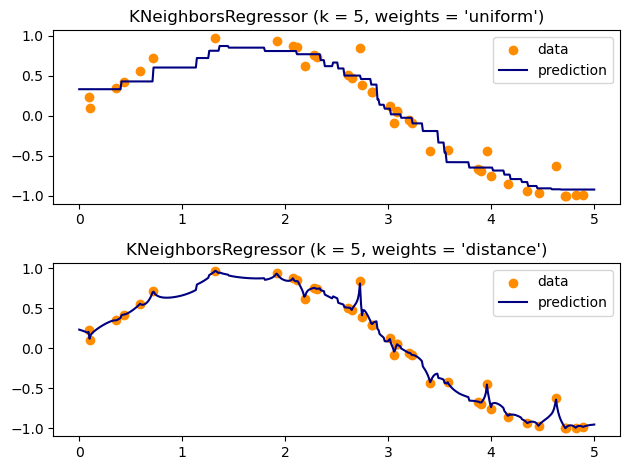

In [3]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [4]:
raw_dat = pd.read_csv("https://raw.githubusercontent.com/diazrenata/feasible-catch/main/keras/fs_data.csv")

In [5]:
dat = raw_dat.copy()

In [6]:
dat = dat.drop(columns = ['sd'])

In [7]:
train_dat = dat.sample(frac = .8, random_state = 0)
test_dat = dat.drop(train_dat.index)

In [8]:
train_dat[['richness', 'abundance']]

,richness,abundance
409,198,250
170,96,150
224,117,150
390,190,15250
308,159,250
...,...,...
207,111,150
279,145,350
227,117,9350
148,86,6850


In [9]:
knn_fs = neighbors.KNeighborsRegressor(5, weights="uniform")

In [10]:
y_ = knn_fs.fit(train_dat[['richness', 'abundance']], train_dat['mean'])

preds = y_.predict(test_dat[['richness', 'abundance']])

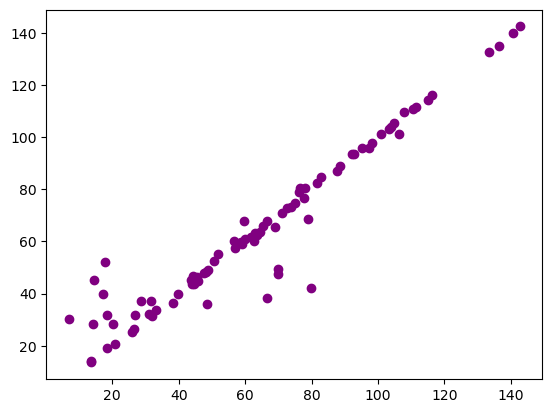

In [11]:
plt.scatter(test_dat['mean'], preds, color = "purple")

In [12]:
y_.score(test_dat[['richness', 'abundance']], test_dat['mean'])

0.918896274592821

Investigating with the new samples...

In [25]:
new_dat_raw = pd.read_csv("https://raw.githubusercontent.com/diazrenata/feasible-catch/main/new_samples.csv")

In [26]:
new_dat = new_dat_raw.copy()
new_dat = new_dat.drop(columns =['sd'])

In [39]:
new_train_dat = new_dat.sample(frac = .8, random_state = 0)
new_test_dat = new_dat.drop(new_train_dat.index)

In [40]:
len(new_train_dat)

392

In [41]:
len(new_test_dat)

98

In [58]:
new_knn = neighbors.KNeighborsRegressor(3, weights = "uniform")

In [59]:
new_y_ = new_knn.fit(new_train_dat[['richness', 'abundance']], new_train_dat['mean'])
new_preds = new_y_.predict(new_test_dat[['richness', 'abundance']])

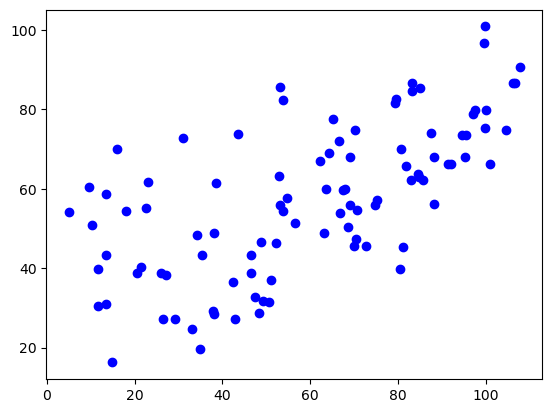

In [60]:
plt.scatter(new_test_dat['mean'], new_preds, color = "blue")

(array([ 2.,  1.,  1.,  2.,  2.,  2.,  4.,  0.,  1.,  4.,  3.,  3.,  3.,
        10.,  7.,  5.,  6.,  6.,  8., 13.,  7.,  3.,  2.,  2.,  1.]),
 array([-53.82030343, -50.03583684, -46.25137025, -42.46690366,
        -38.68243707, -34.89797048, -31.11350389, -27.32903731,
        -23.54457072, -19.76010413, -15.97563754, -12.19117095,
         -8.40670436,  -4.62223777,  -0.83777118,   2.94669541,
          6.731162  ,  10.51562859,  14.30009518,  18.08456176,
         21.86902835,  25.65349494,  29.43796153,  33.22242812,
         37.00689471,  40.7913613 ]),
 <BarContainer object of 25 artists>)

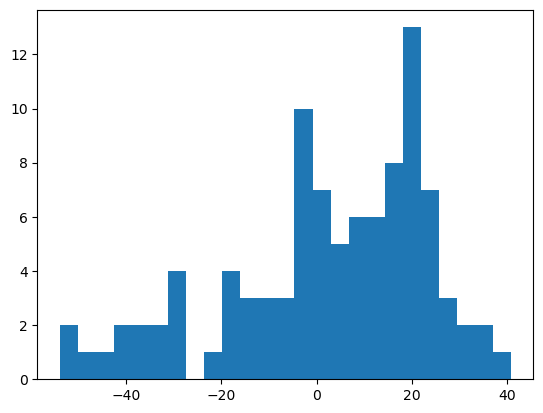

In [61]:
error = new_test_dat['mean'] - new_preds
plt.hist(error, bins = 25)

In [62]:
new_y_.score(new_test_dat[['richness', 'abundance']], new_test_dat['mean'])

0.419453109651478